# TASK 4

Analyze traffic accident data to identify patterns realted to road conditions,weather and time of the day,. visualize accident hotspots and contributing factors

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("C:\\Users\\haris\\Downloads\\archive (1)\\US_Accidents_March23.csv")

In [7]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [30]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

### Parse and Extract Time Features

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')


In [20]:

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

### Accidents by Hour of Day

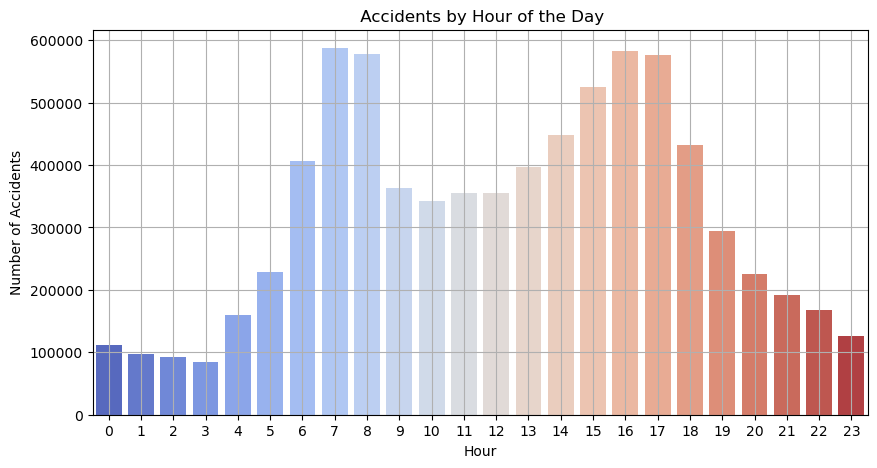

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm') 
plt.title(' Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

 ### Accidents by Weather Condition

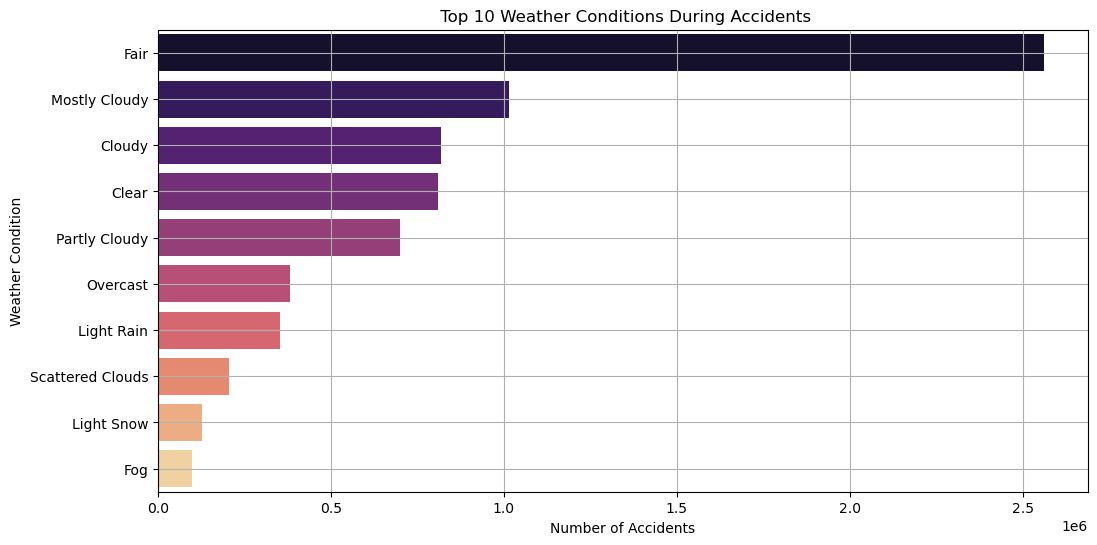

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', 
              data=df, 
              order=df['Weather_Condition'].value_counts().iloc[:10].index,
              palette='magma')
plt.title(' Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.grid()
plt.show()


### Severity vs Time, Weather, Visibility

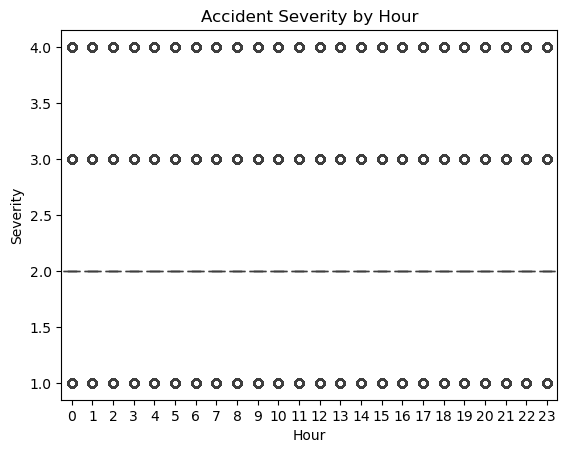

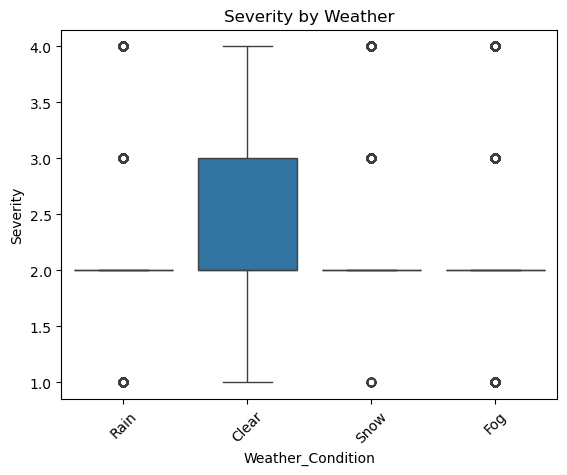

In [40]:
# Severity vs Hour
sns.boxplot(x='Hour', y='Severity', data=df)
plt.title("Accident Severity by Hour")
plt.show()

# Severity vs Weather
sns.boxplot(x='Weather_Condition', y='Severity', data=df[df['Weather_Condition'].isin(['Rain', 'Fog', 'Snow', 'Clear'])])
plt.xticks(rotation=45)
plt.title("Severity by Weather")
plt.show()


### Hotspot Map Using Folium

In [47]:
pip install folium

In [49]:
import folium
from folium.plugins import HeatMap

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

m = folium.Map(location=[39.5, -98.35], zoom_start=5)  # center of US
HeatMap(data=sample_df.values.tolist(), radius=10).add_to(m)

m.save('us_accident_hotspots.html')


In [56]:
from IPython.display import display
display(m)


### Correlation Analysis

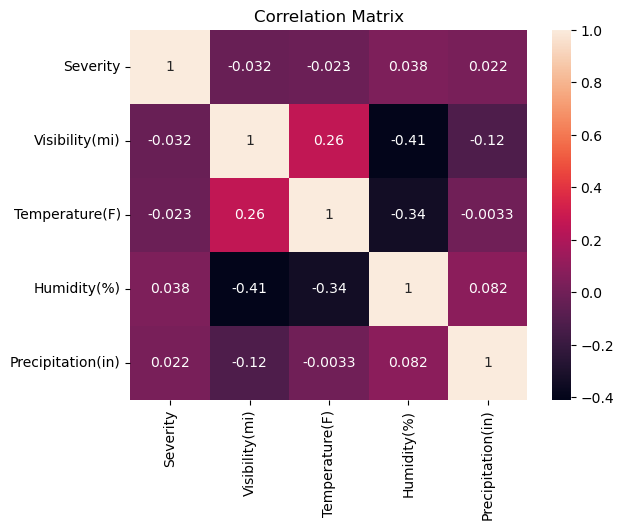

In [52]:
df_corr = df[['Severity', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)', 'Precipitation(in)']].dropna()
sns.heatmap(df_corr.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


### Conclusion Points

Accidents peak during rush hours (7–9 AM, 4–6 PM).

Rain, fog, and snow conditions show higher severity rates.

Severity tends to increase when visibility is low or precipitation is high.

Hotspots are concentrated around major cities and highways (based on lat/lon heatmap).

Data from 2016 to 2023 shows a consistent pattern in seasonal variations.

